In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import sys
import subprocess
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np

In [22]:
def dataloader(verbose=True):
    if verbose:
        print("loading the data...", end="\t")
    data_list = []
    ##### CHANGE PATH ######
    files = tqdm(glob.glob("../TrainData/*/*/*.csv")) if verbose else glob.glob("../TrainData/*/*/*.csv")
    ##### ##### ##### ######
    for file in files:
        tempdf = pd.read_csv(file)
        accepted_cols = 
        data_list.append(tempdf)
    return data_list

In [23]:
data_list = dataloader()

loading the data...	

100%|██████████| 151/151 [00:08<00:00, 18.26it/s]


In [40]:
def generate_video(img, folder, act, subject, i, v_folder):
    folder = os.path.abspath(folder)
    v_folder = os.path.abspath(v_folder)
    plt.imshow(img, cmap=cm.Greys_r)
    plt.savefig(folder + f"/a{act}_s{subject}_{i}.png")

    os.chdir(v_folder)
    subprocess.call([
        'ffmpeg', '-framerate', '8', '-i', f"{folder}/a{act}_s{subject}_{i}.png", '-r', '30', '-pix_fmt', 'yuv420p',
        f"a{act}_s{subject}_{i}.mp4"
    ])

FileNotFoundError: [WinError 2] The system cannot find the file specified

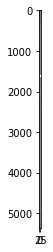

In [41]:
i = 0
for d in data_list:
    act = d.loc[0, "activity"]
    sub = d.loc[0, "subject_id"]
    generate_video(d.to_numpy(), "../skel_plot", act, sub, i, "../skel_vid")
    i += 1
    break